In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Reading in Data & Renaming columns

In [2]:
df_data = pd.read_excel('Case Study_Sr. Financial Analyst (3).xlsx',sheet_name='Raw Data')
df_data['txid'] = df_data['Company'] + df_data['Quarter']

df_TKG_Deals = pd.read_excel('Case Study_Sr. Financial Analyst (3).xlsx',sheet_name='TKG Deals')
df_TKG_Deals.rename(columns={"Customer Name": "Company"}, inplace=True)
df_TKG_Deals['txid'] = df_TKG_Deals['Company'] + df_TKG_Deals['Quarter']



## Fixing any messy data found during data exploration

In [3]:
df_data.set_index('Company',inplace=True)


In [4]:
df_data['Data']['Terex Corp'] = df_data['Data']['Terex Corp'].apply(lambda x: 1086024 if x > 0 else 0)
df_data['TAS']['Terex Corp'] = df_data['TAS']['Terex Corp'].apply(lambda x: 2704151 if x > 0 else 0)

df_data['Data']['Texas Industries Inc.'] = df_data['Data']['Terex Corp'].apply(lambda x: 18514 if x > 0 else 0)

df_data['TAS']['First National of Nebraska Inc.'] = df_data['TAS']['First National of Nebraska Inc.'].apply(lambda x: 5504298 if x > 0 else 0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaco

In [5]:
df_data.reset_index(inplace=True)
df_data.drop(241, inplace=True)
df_data.drop(243, inplace=True)
df_data.drop(249, inplace=True)

In [6]:
df_TKG_Deals.set_index('Company', inplace=True)
df_TKG_Deals['ACV']['Winn Dixie Stores Inc'] = df_TKG_Deals['ACV']['Winn Dixie Stores Inc'].apply(lambda x: 2356196 if x > 0 else 0)
df_TKG_Deals['TCV']['Winn Dixie Stores Inc'] = df_TKG_Deals['TCV']['Winn Dixie Stores Inc'].apply(lambda x: 1925968 if x > 0 else 0)
df_TKG_Deals['Quarter']['Park Place Entertainment Corp'] = '2020-Q3'
df_TKG_Deals.reset_index(inplace=True)
df_TKG_Deals.drop(46, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

## Adjusting TKG values for values captured in TAS

In [7]:
def final_acv(cols):
    acv = cols[0]
    tas = cols[1]
    
    if tas > 0:
        if tas > acv:
            return 0
        else:
            return acv - tas
    else:
        return acv

## Merging both Data Frames together for Final Data

In [8]:
df_final = pd.merge(df_TKG_Deals,df_data, how='outer')
df_final['TKG_acv'] =  df_final[['ACV','TAS']].apply(final_acv, axis=1)


## Analysis will include only Positive ACV values. Negatives will be considered a refund

In [9]:
df_final['TKG_acv'] = df_final['TKG_acv'].apply(lambda x: x if x>0 else 0)
df_final['Data'] = df_final['Data'].apply(lambda x: x if x>0 else 0)
df_final['TAS'] = df_final['TAS'].apply(lambda x: x if x>0 else 0)
df_final['TCV'] = df_final['TCV'].apply(lambda x: x if x>0 else 0)
df_final['ACV'] = df_final['ACV'].apply(lambda x: x if x>0 else 0)

## Housekeeping. Renaming columns to avoid confusion

In [10]:
df_final['Data_acv'] = df_final['Data']
df_final['TAS_acv'] = df_final['TAS']
df_final.drop(['ACV', 'Data', 'TCV', 'TAS'], axis=1, inplace=True)

## Adding count identifier. Will only count if ACV > 0

In [11]:
df_final['TKG_count'] = df_final['TKG_acv'].apply(lambda x: 1 if x > 0 else 0)
df_final['Data_count'] = df_final['Data_acv'].apply(lambda x: 1 if x > 0 else 0)
df_final['TAS_count'] = df_final['TAS_acv'].apply(lambda x: 1 if x > 0 else 0)

# Quarterly Summary by Sum

In [12]:
df_quarter_summary_sum = df_final.groupby('Quarter').sum().round(2)
df_quarter_summary_sum.reset_index(inplace=True)
df_quarter_summary_sum['Total_acv'] = df_quarter_summary_sum['TKG_acv'] + df_quarter_summary_sum['Data_acv'] + df_quarter_summary_sum['TAS_acv']
df_quarter_summary_sum['Total_count'] = df_quarter_summary_sum['TKG_count'] + df_quarter_summary_sum['Data_count'] + df_quarter_summary_sum['TAS_count']
df_quarter_summary_sum

,Quarter,TKG_acv,Data_acv,TAS_acv,TKG_count,Data_count,TAS_count,Total_acv,Total_count
0,2018-Q4,1867861.0,0.0,102121.0,7,0,1,1969982.0,8
1,2019-Q1,9821570.0,0.0,1792509.0,13,0,3,11614079.0,16
2,2019-Q2,8887773.0,1569605.0,1609537.0,8,10,4,12066915.0,22
3,2019-Q3,7092220.0,2901355.0,14345886.0,7,10,10,24339461.0,27
4,2019-Q4,6638363.0,1071360.0,5193399.0,7,12,9,12903122.0,28
5,2020-Q1,10865854.0,4243508.0,975197.0,9,18,6,16084559.0,33
6,2020-Q2,4980841.0,5175071.0,30635683.0,6,13,19,40791595.0,38
7,2020-Q3,5232708.0,4324874.0,12960137.0,7,15,16,22517719.0,38
8,2020-Q4,4635823.0,10343342.0,37005381.0,4,20,38,51984546.0,62
9,2021-Q1,4493513.0,8347376.0,24800695.0,8,29,23,37641584.0,60


## Quarterly Summary by Count only

In [13]:
df_quarter_count_sum = df_quarter_summary_sum.drop(['TKG_acv', 'Data_acv','TAS_acv','Total_acv'], axis=1)
df_quarter_count_sum
df_quarter_count_sum

,Quarter,TKG_count,Data_count,TAS_count,Total_count
0,2018-Q4,7,0,1,8
1,2019-Q1,13,0,3,16
2,2019-Q2,8,10,4,22
3,2019-Q3,7,10,10,27
4,2019-Q4,7,12,9,28
5,2020-Q1,9,18,6,33
6,2020-Q2,6,13,19,38
7,2020-Q3,7,15,16,38
8,2020-Q4,4,20,38,62
9,2021-Q1,8,29,23,60


## Quarterly Summary by ACV only

In [14]:
df_quarter_acv_sum = df_quarter_summary_sum.drop(['TKG_count', 'Data_count','TAS_count', 'Total_count'], axis=1)
df_quarter_acv_sum

,Quarter,TKG_acv,Data_acv,TAS_acv,Total_acv
0,2018-Q4,1867861.0,0.0,102121.0,1969982.0
1,2019-Q1,9821570.0,0.0,1792509.0,11614079.0
2,2019-Q2,8887773.0,1569605.0,1609537.0,12066915.0
3,2019-Q3,7092220.0,2901355.0,14345886.0,24339461.0
4,2019-Q4,6638363.0,1071360.0,5193399.0,12903122.0
5,2020-Q1,10865854.0,4243508.0,975197.0,16084559.0
6,2020-Q2,4980841.0,5175071.0,30635683.0,40791595.0
7,2020-Q3,5232708.0,4324874.0,12960137.0,22517719.0
8,2020-Q4,4635823.0,10343342.0,37005381.0,51984546.0
9,2021-Q1,4493513.0,8347376.0,24800695.0,37641584.0



# -------------------------------------------------------------


# Question 1A:

# Chart of Total and Products by Count

<Figure size 864x576 with 0 Axes>

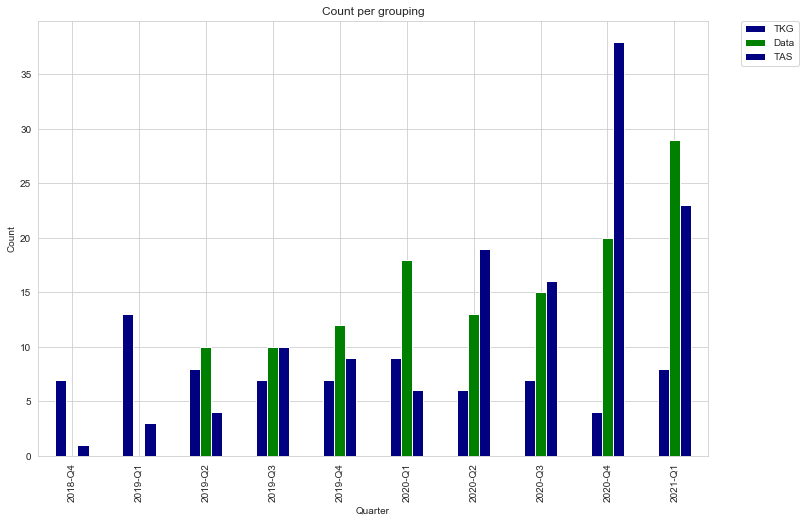

In [15]:

plt.figure(figsize=(12,8))

quarter = list(df_quarter_summary_sum['Quarter'])
TKG_count = list(df_quarter_summary_sum['TKG_count'])
Data_count = list(df_quarter_summary_sum['Data_count'])
TAS_count = list(df_quarter_summary_sum['TAS_count'])

TKG = pd.Series(TKG_count, index=quarter)
Data = pd.Series(Data_count, index=quarter)
TAS = pd.Series(TAS_count, index=quarter)

df = pd.DataFrame({"TKG":TKG,"Data":Data, "TAS":TAS})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Quarter")
ax.set_ylabel("Count")
ax.set_title('Count per grouping')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

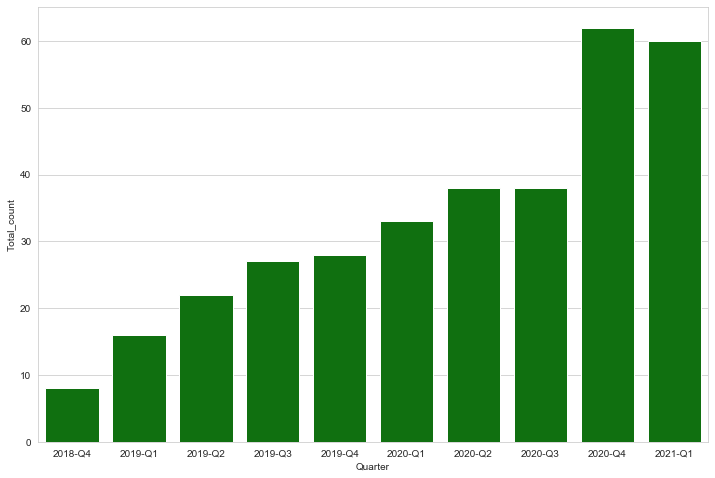

In [16]:
plt.figure(figsize=(12,8))

sns.barplot(x='Quarter', y='Total_count', data=df_quarter_summary_sum, color='green')

# Quarterly Summary by Average

In [17]:
df_quarter_summary_mean = df_quarter_summary_sum
df_quarter_summary_mean['TKG_acv_mean'] = (df_quarter_summary_mean['TKG_acv']/df_quarter_summary_mean['TKG_count']).round(2)
df_quarter_summary_mean['Data_acv_mean'] = (df_quarter_summary_mean['Data_acv']/df_quarter_summary_mean['Data_count']).round(2)
df_quarter_summary_mean['TAS_acv_mean'] = (df_quarter_summary_mean['TAS_acv']/df_quarter_summary_mean['TAS_count']).round(2)
df_quarter_summary_mean['Total_acv_mean'] = (df_quarter_summary_mean['Total_acv']/df_quarter_summary_mean['Total_count']).round(2)

df_quarter_summary_mean = df_quarter_summary_mean[['Quarter','TKG_acv_mean',
       'Data_acv_mean', 'TAS_acv_mean', 'Total_acv_mean']]


In [18]:
df_quarter_summary_mean

,Quarter,TKG_acv_mean,Data_acv_mean,TAS_acv_mean,Total_acv_mean
0,2018-Q4,266837.29,NaN,102121.00,246247.75
1,2019-Q1,755505.38,NaN,597503.00,725879.94
2,2019-Q2,1110971.62,156960.50,402384.25,548496.14
3,2019-Q3,1013174.29,290135.50,1434588.60,901461.52
4,2019-Q4,948337.57,89280.00,577044.33,460825.79
5,2020-Q1,1207317.11,235750.44,162532.83,487410.88
6,2020-Q2,830140.17,398082.38,1612404.37,1073463.03
7,2020-Q3,747529.71,288324.93,810008.56,592571.55
8,2020-Q4,1158955.75,517167.10,973825.82,838460.42
9,2021-Q1,561689.12,287840.55,1078291.09,627359.73


<Figure size 864x576 with 0 Axes>

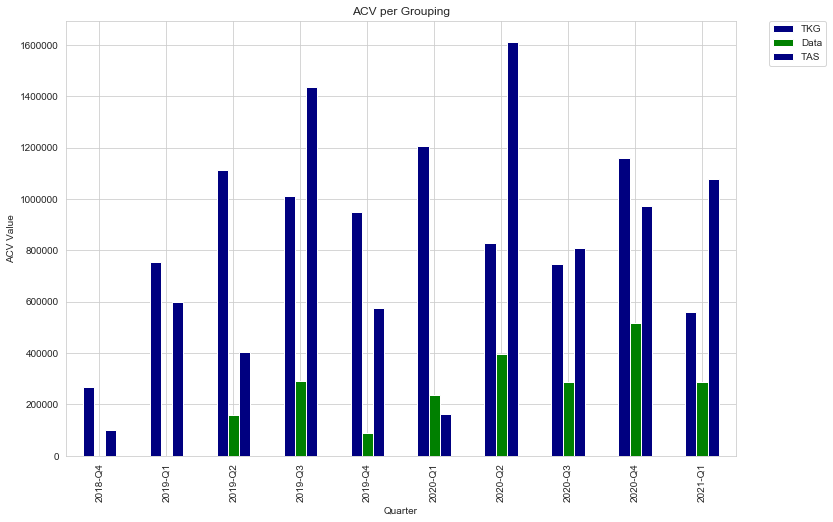

In [19]:
plt.figure(figsize=(12,8))

quarter = list(df_quarter_summary_mean['Quarter'])
TKG_acv = list(df_quarter_summary_mean['TKG_acv_mean'])
Data_acv = list(df_quarter_summary_mean['Data_acv_mean'])
TAS_acv = list(df_quarter_summary_mean['TAS_acv_mean'])

TKG = pd.Series(TKG_acv, index=quarter)
Data = pd.Series(Data_acv, index=quarter)
TAS = pd.Series(TAS_acv, index=quarter)

df = pd.DataFrame({"TKG":TKG,"Data":Data, "TAS":TAS})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Quarter")
ax.set_ylabel("ACV Value")
ax.set_title('ACV per Grouping')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

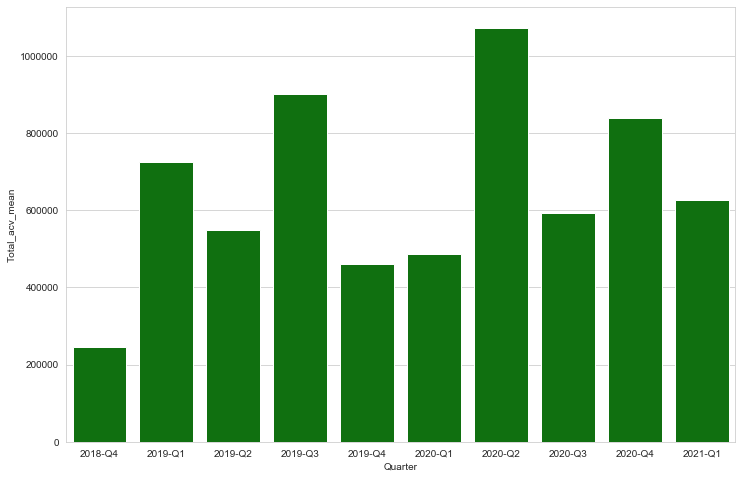

In [20]:
plt.figure(figsize=(12,8))

sns.barplot(x='Quarter', y='Total_acv_mean', data=df_quarter_summary_mean, color='g')

## Function for if value has already occurred in Data

In [21]:
def new_or_renewal(index, cols):
    val = cols[index]
    company = cols[:index]
    count = 0
    
    if val in company:
        return 1
    return 0

    
    
    

## Splitting Data set into each respective product

In [22]:
df_TKG = df_final[df_final['TKG_count'] > 0][['Company','Quarter', 'txid', 'TKG_acv','TKG_count']]
df_TKG.set_index('Company', inplace=True)
df_TKG.reset_index(inplace=True)

df_Data = df_final[df_final['Data_count'] > 0][['Company','Quarter', 'txid', 'Data_acv','Data_count']]
df_Data.set_index('Company', inplace=True)
df_Data.reset_index(inplace=True)

df_TAS = df_final[df_final['TAS_count'] > 0][['Company','Quarter', 'txid', 'TAS_acv','TAS_count']]
df_TAS.set_index('Company', inplace=True)
df_TAS.reset_index(inplace=True)


## Applying Renewal function against each Data set to determine if customer bought each product before

## Reason: Doesn't make sense to have Renewals against different product lines. Should count renewals for particular product only if that product was purchased before

In [23]:
df_TKG['Existing_Renewal'] = df_TKG['txid'].apply(lambda x: new_or_renewal(df_TKG[df_TKG['txid'] == x].index.values.astype(int)[0], list(df_TKG['Company'])))

df_Data['Existing_Renewal'] = df_Data['txid'].apply(lambda x: new_or_renewal(df_Data[df_Data['txid'] == x].index.values.astype(int)[0], list(df_Data['Company'])))

df_TAS['Existing_Renewal']=df_TAS['txid'].apply(lambda x: new_or_renewal(df_TAS[df_TAS['txid'] == x].index.values.astype(int)[0], list(df_TAS['Company'])))



In [24]:
df_TKG

,Company,Quarter,txid,TKG_acv,TKG_count,Existing_Renewal
0,Alcoa Inc.,2018-Q4,Alcoa Inc.2018-Q4,424003.0,1,0
1,Apartment Investment and Management Company,2018-Q4,Apartment Investment and Management Company201...,60457.0,1,0
2,Ciena Corp.,2018-Q4,Ciena Corp.2018-Q4,500000.0,1,0
3,Cigna Corp,2018-Q4,Cigna Corp2018-Q4,93758.0,1,0
4,Cincinnati Financial Corp.,2018-Q4,Cincinnati Financial Corp.2018-Q4,37500.0,1,0
...,...,...,...,...,...,...
71,Harris Corp.,2021-Q1,Harris Corp.2021-Q1,726139.0,1,0
72,Owens Corning,2021-Q1,Owens Corning2021-Q1,164384.0,1,1
73,Owens-Illinois Inc,2021-Q1,Owens-Illinois Inc2021-Q1,722443.0,1,1
74,Packaging Corp. of America,2021-Q1,Packaging Corp. of America2021-Q1,577248.0,1,1


## Merging the Data Frames back together

## Note: More rows than original final data set because Data and TAS did not have separate data frames before

In [25]:
df_merged = pd.concat([df_TKG, df_Data, df_TAS])
df_merged.set_index('Quarter', inplace=True)
df_merged.reset_index(inplace=True)

df_merged.fillna(value=0, inplace=True)
df_merged

,Quarter,Company,txid,TKG_acv,TKG_count,Existing_Renewal,Data_acv,Data_count,TAS_acv,TAS_count
0,2018-Q4,Alcoa Inc.,Alcoa Inc.2018-Q4,424003.0,1.0,0,0.0,0.0,0.0,0.0
1,2018-Q4,Apartment Investment and Management Company,Apartment Investment and Management Company201...,60457.0,1.0,0,0.0,0.0,0.0,0.0
2,2018-Q4,Ciena Corp.,Ciena Corp.2018-Q4,500000.0,1.0,0,0.0,0.0,0.0,0.0
3,2018-Q4,Cigna Corp,Cigna Corp2018-Q4,93758.0,1.0,0,0.0,0.0,0.0,0.0
4,2018-Q4,Cincinnati Financial Corp.,Cincinnati Financial Corp.2018-Q4,37500.0,1.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
327,2021-Q1,Hewlett-Packard Company,Hewlett-Packard Company2021-Q1,0.0,0.0,0,0.0,0.0,1877250.0,1.0
328,2021-Q1,Hibernia Corp.,Hibernia Corp.2021-Q1,0.0,0.0,0,0.0,0.0,176940.0,1.0
329,2021-Q1,Maytag Corporation,Maytag Corporation2021-Q1,0.0,0.0,0,0.0,0.0,74170.0,1.0
330,2021-Q1,MBNA Corporation,MBNA Corporation2021-Q1,0.0,0.0,0,0.0,0.0,629989.0,1.0


## Check against df_merged total sum against df_final

In [26]:
print(f"df_merged: {sum(df_merged['Data_acv'])}")
print(f"df_final: {sum(df_final['Data_acv'])}")


df_merged: 37976491.0
df_final: 37976491.0


## Isolating New vs Renewal Customers within each product line

In [27]:
new_TKG = df_TKG[df_TKG['Existing_Renewal'] == 0]
quarter_new_TKG = new_TKG.groupby('Quarter').sum()
quarter_new_TKG.reset_index(inplace=True)

renewed_TKG = df_TKG[df_TKG['Existing_Renewal'] > 0]
quarter_renewed_TKG = renewed_TKG.groupby('Quarter').sum()
quarter_renewed_TKG.reset_index(inplace=True)

###

new_Data = df_Data[df_Data['Existing_Renewal'] == 0]
quarter_new_Data = new_Data.groupby('Quarter').sum()
quarter_new_Data.reset_index(inplace=True)

renewed_Data = df_Data[df_Data['Existing_Renewal'] > 0]
quarter_renewed_Data = renewed_Data.groupby('Quarter').sum()
quarter_renewed_Data.reset_index(inplace=True)


###

new_TAS = df_TAS[df_TAS['Existing_Renewal'] == 0]
quarter_new_TAS = new_TAS.groupby('Quarter').sum()
quarter_new_TAS.reset_index(inplace=True)

renewed_TAS = df_TAS[df_TAS['Existing_Renewal'] > 0]
quarter_renewed_TAS = renewed_TAS.groupby('Quarter').sum()
quarter_renewed_TAS.reset_index(inplace=True)


In [28]:
quarter_new_TKG
quarter_new_TKG.rename(columns={"TKG_acv": "TKG_new_acv", "TKG_count": "TKG_new_count"}, inplace=True)

quarter_renewed_TKG
quarter_renewed_TKG.rename(columns={"TKG_acv": "TKG_renewed_acv", "TKG_count": "TKG_renewed_count"}, inplace=True)

TKG_summary = pd.concat([quarter_new_TKG,quarter_renewed_TKG])
TKG_summary.fillna(value=0, inplace=True)
TKG_summary = TKG_summary.groupby('Quarter').sum()
TKG_summary.reset_index(inplace=True)

###

quarter_new_Data
quarter_new_Data.rename(columns={"Data_acv": "Data_new_acv", "Data_count": "Data_new_count"}, inplace=True)

quarter_renewed_Data
quarter_renewed_Data.rename(columns={"Data_acv": "Data_renewed_acv", "Data_count": "Data_renewed_count"}, inplace=True)

Data_summary = pd.concat([quarter_new_Data,quarter_renewed_Data])
Data_summary.fillna(value=0, inplace=True)
Data_summary = Data_summary.groupby('Quarter').sum()
Data_summary.reset_index(inplace=True)

###

quarter_new_TAS
quarter_new_TAS.rename(columns={"TAS_acv": "TAS_new_acv", "TAS_count": "TAS_new_count"}, inplace=True)

quarter_renewed_TAS
quarter_renewed_TAS.rename(columns={"TAS_acv": "TAS_renewed_acv", "TAS_count": "TAS_renewed_count"}, inplace=True)

TAS_summary = pd.concat([quarter_new_TAS,quarter_renewed_TAS])
TAS_summary.fillna(value=0, inplace=True)
TAS_summary = TAS_summary.groupby('Quarter').sum()
TAS_summary.reset_index(inplace=True)


## TKG New vs Renewal Values by Quarater

<Figure size 864x576 with 0 Axes>

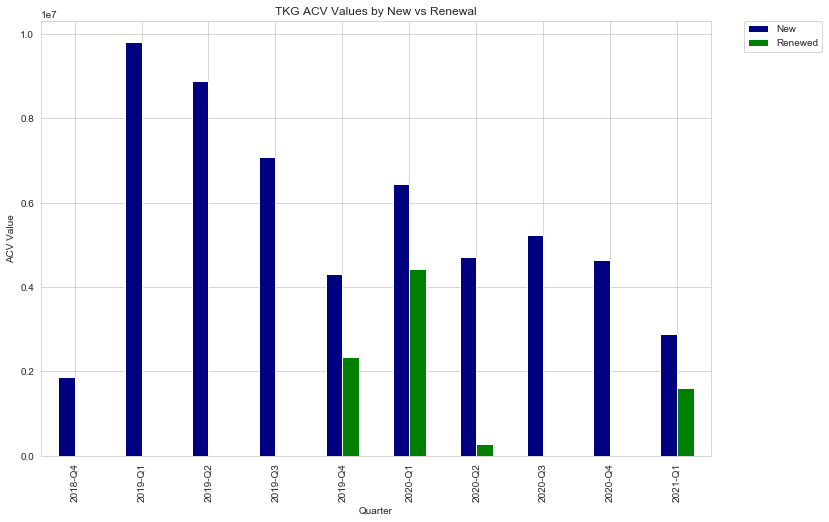

In [29]:
plt.figure(figsize=(12,8))

quarter = list(TKG_summary['Quarter'])

new_TKG_acv = list(TKG_summary['TKG_new_acv'])

renewed_TKG_acv = list(TKG_summary['TKG_renewed_acv'])

New = pd.Series(new_TKG_acv, index=quarter)
Renewed = pd.Series(renewed_TKG_acv, index=quarter)

df = pd.DataFrame({"New":New,"Renewed":Renewed})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Quarter")
ax.set_ylabel("ACV Value")
ax.set_title('TKG ACV Values by New vs Renewal')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Data New vs Renewals by Quarter

<Figure size 864x576 with 0 Axes>

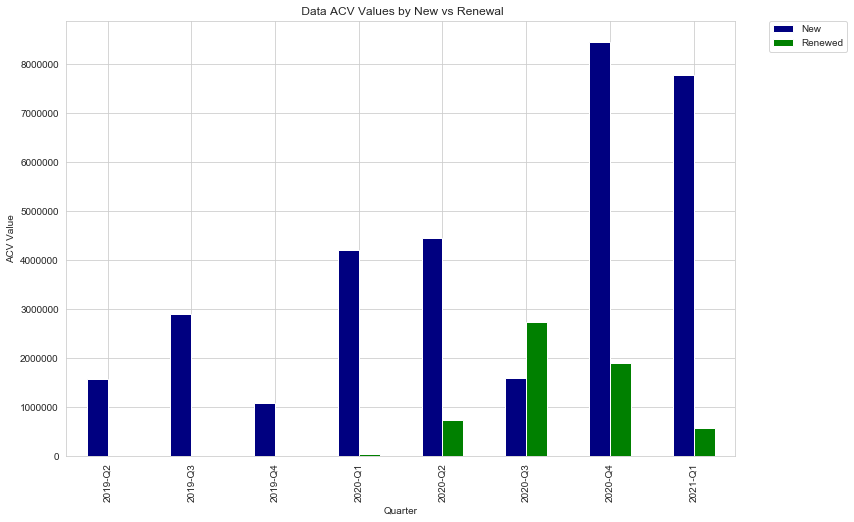

In [30]:
plt.figure(figsize=(12,8))

quarter = list(Data_summary['Quarter'])

new_DATA_acv = list(Data_summary['Data_new_acv'])

renewed_DATA_acv = list(Data_summary['Data_renewed_acv'])

New = pd.Series(new_DATA_acv, index=quarter)
Renewed = pd.Series(renewed_DATA_acv, index=quarter)

df = pd.DataFrame({"New":New,"Renewed":Renewed})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Quarter")
ax.set_ylabel("ACV Value")
ax.set_title(' Data ACV Values by New vs Renewal')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## TAS New vs Renewal Values by Quarater

<Figure size 864x576 with 0 Axes>

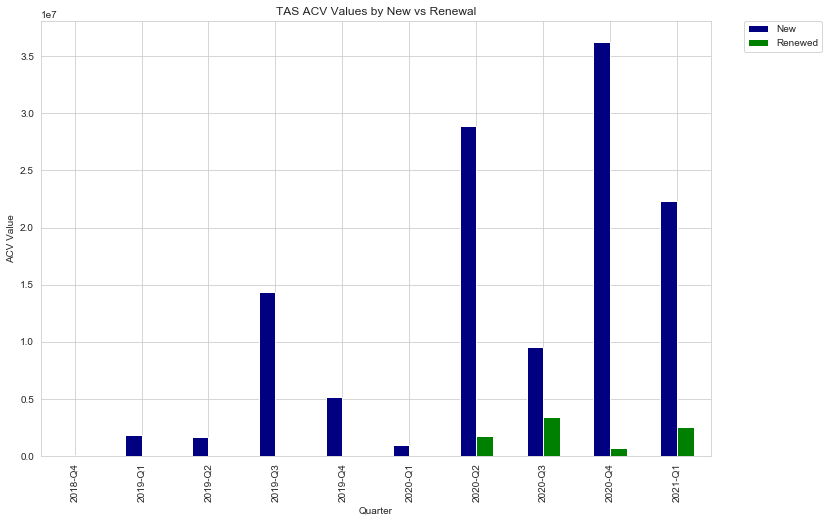

In [31]:
plt.figure(figsize=(12,8))

quarter = list(TAS_summary['Quarter'])

new_TAS_acv = list(TAS_summary['TAS_new_acv'])

renewed_TAS_acv = list(TAS_summary['TAS_renewed_acv'])

New = pd.Series(new_TAS_acv, index=quarter)
Renewed = pd.Series(renewed_TAS_acv, index=quarter)

df = pd.DataFrame({"New":New,"Renewed":Renewed})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Quarter")
ax.set_ylabel("ACV Value")
ax.set_title('TAS ACV Values by New vs Renewal')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [32]:
sum(df_Data['Data_acv'])

37976491.0

In [33]:
sum(df_TAS['TAS_acv'])

129420545.0

In [34]:
sum(df_TKG['TKG_acv'])

64516526.0

In [35]:
sum(df_merged['TKG_acv']) + sum(df_merged['Data_acv']) + sum(df_merged['TAS_acv'])

231913562.0